In [118]:
import json
import pandas as pd

with open('data/troll_comments.txt') as json_file: 
    troll_data = json.load(json_file)
    
with open('data/troll_posts.txt') as json_file: 
    troll_post_data = json.load(json_file)

with open('data/normie_comments1.txt') as json_file:
    normie_data = json.load(json_file)
    
with open('data/normie_posts.txt') as json_file: 
    normie_post_data = json.load(json_file)
    
data = {}
data['comments'] = troll_data['comments'] + normie_data['comments']
data['label'] = troll_data['label'] + normie_data['label']
data['created_utc'] = troll_data['created_utc'] + normie_data['created_utc']
data['score'] = troll_data['score'] + normie_data['score']
data['subreddit'] = troll_data['subreddit'] + normie_data['subreddit']
df = pd.DataFrame(data)

post_data = {}
post_data['created_utc'] = troll_post_data['created_utc'] + normie_post_data['created_utc']
post_data['num_comments'] = troll_post_data['num_comments'] + normie_post_data['num_comments']
post_data['score'] = troll_post_data['score'] + normie_post_data['score']
post_data['subreddit'] = troll_post_data['subreddit'] + normie_post_data['subreddit']
post_data['title'] = troll_post_data['title'] + normie_post_data['title']
post_data['selftext'] = troll_post_data['selftext'] + normie_post_data['selftext']
post_data['label'] = troll_post_data['label'] + normie_post_data['label']

post_df = pd.DataFrame(post_data)
# print(post_df.head())
# print(post_df.tail())
print(post_df['title'])

0                        Hillary's war on Black Americans
1                        Hillary's war on Black Americans
2                        Hillary's war on Black Americans
3        Clinton's war on Black Americans (#NeverHillary)
4        Clinton's war on Black Americans (#NeverHillary)
                               ...                       
33454              Vampire Counts not dying after battle?
33455                                            Selvaria
33456                                            Sylvaria
33457                                   Open Visitors Day
33458                                       Lyria Viserne
Name: title, Length: 33459, dtype: object


In [119]:
col = ['label', 'comments']
comment_df = df[col]
comment_df.head()

,label,comments
0,1,That is not a personal blog
1,1,"Sorry, but if you bothered to read the article..."
2,1,"By submitting to an independent, non-profit co..."
3,1,&gt; large-scale military exercises near Russi...
4,1,"Well, in this country it's either you are top ..."


In [120]:
col = ['label', 'subreddit']
comment_subreddit_df = df[col]
comment_subreddit_df = comment_subreddit_df.iloc[0:40000]
comment_subreddit_df

,label,subreddit
0,1,politics
1,1,politics
2,1,politics
3,1,worldnews
4,1,worldnews
...,...,...
39995,0,videos
39996,0,AskReddit
39997,0,InternetIsBeautiful
39998,0,AskReddit


In [121]:
comment_df = comment_df.iloc[0:40000]
comment_df.info

<bound method DataFrame.info of        label                                           comments
0          1                        That is not a personal blog
1          1  Sorry, but if you bothered to read the article...
2          1  By submitting to an independent, non-profit co...
3          1  &gt; large-scale military exercises near Russi...
4          1  Well, in this country it's either you are top ...
...      ...                                                ...
39995      0          Detecting cyber ninjas in stealth suits. 
39996      0                                 You guys are lucky
39997      0  I would say no. You can't really learn code th...
39998      0  Eh, a cheap pellet gun shoots at about 800fps,...
39999      0  Fixed, unlicensed sports gambling. \n\nI hoste...

[40000 rows x 2 columns]>

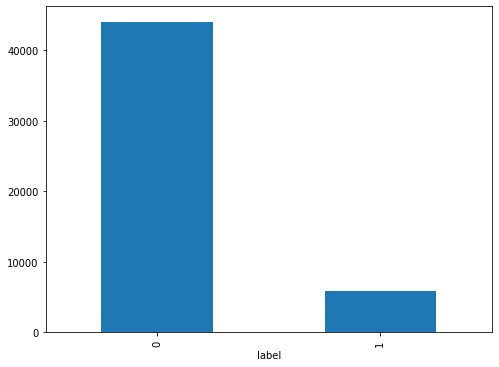

In [38]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
comment_df.groupby('label').comments.count().plot.bar(ylim=0)
plt.show()

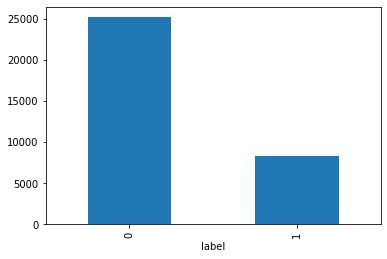

In [39]:
post_df.groupby('label').title.count().plot.bar(ylim=0)
plt.show()

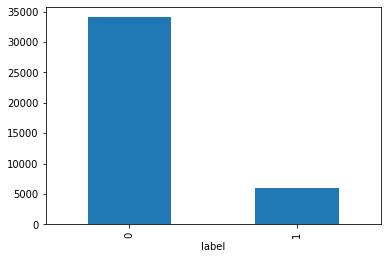

In [40]:
comment_subreddit_df.groupby('label').subreddit.count().plot.bar(ylim=0)
plt.show()

In [122]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

In [123]:
features = tfidf.fit_transform(comment_df.comments).toarray()
post_features = tfidf.fit_transform(post_df.title).toarray()
comment_subreddit_features = tfidf.fit_transform(comment_subreddit_df.subreddit).toarray()

In [124]:
labels = comment_df.label
post_labels = post_df.label
comment_subreddit_labels = comment_subreddit_df.label

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
names = ['RFC', 'LSVC', 'MNB', 'LR']
i = 0
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
     LinearSVC(),
     MultinomialNB(),
     LogisticRegression(random_state=0),
]
CV = 5

In [126]:
models = [
    ExtraTreesClassifier(),
    RandomForestClassifier(),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0)]

for model in models:
    print('Train, test, split')
    X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, comment_df.index, test_size=0.33, random_state=0)
    
    print('Fit')
    model.fit(X_train, y_train)

    print('Predict')
    y_pred = model.predict(X_test)

    from sklearn.metrics import confusion_matrix
    print(metrics.confusion_matrix(y_test, y_pred, labels=[1,0]))
    print(metrics.classification_report(y_test, y_pred, labels=[0,1]))

Train, test, split
Fit


KeyboardInterrupt: 

model:RFC
fold
fold
fold
fold
fold
model:LSVC
fold
fold
fold
fold
fold
model:MNB
fold
fold
fold
fold
fold
model:LR
fold
fold
fold
fold
fold


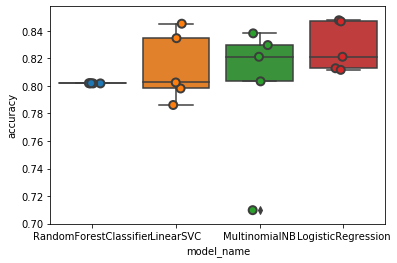

In [46]:
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  print('model:' + names[i])
  i+=1
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    print('fold')
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [47]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.813333
LogisticRegression        0.828033
MultinomialNB             0.800433
RandomForestClassifier    0.801900
Name: accuracy, dtype: float64

model:RFC
fold
fold
fold
fold
fold
model:LSVC
fold
fold
fold
fold
fold
model:MNB
fold
fold
fold
fold
fold
model:LR
fold
fold
fold
fold
fold


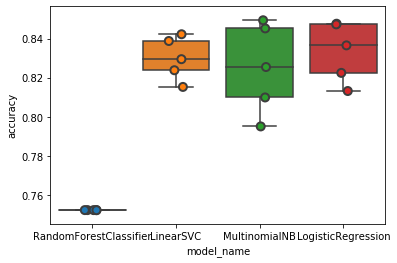

In [28]:
cv_df2 = pd.DataFrame(index=range(CV * len(models)))
entries = []
i=0
for model in models:
  print('model:' + names[i])
  i+=1
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, post_features, post_labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    print('fold')
    entries.append((model_name, fold_idx, accuracy))
cv_df2 = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df2)
sns.stripplot(x='model_name', y='accuracy', data=cv_df2, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [29]:
cv_df2.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.829911
LogisticRegression        0.833408
MultinomialNB             0.825010
RandomForestClassifier    0.752384
Name: accuracy, dtype: float64

In [45]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, comment_df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import confusion_matrix
print(metrics.confusion_matrix(y_test, y_pred, labels=[0,1]))
print(metrics.classification_report(y_test, y_pred, labels=[0,1]))

KeyboardInterrupt: 

In [49]:
# Chart bots top 10 post subreddits
# Chart bots top 10 comment subreddits
# Chart Average scores per post in subreddit
# Chart average comments per post in subreddit
model = LogisticRegression(random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(metrics.confusion_matrix(y_test, y_pred, labels=[0,1]))
print(metrics.classification_report(y_test, y_pred, labels=[0,1]))

[[7892   64]
 [1547  397]]
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      7956
           1       0.86      0.20      0.33      1944

    accuracy                           0.84      9900
   macro avg       0.85      0.60      0.62      9900
weighted avg       0.84      0.84      0.79      9900



In [51]:
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(metrics.confusion_matrix(y_test, y_pred, labels=[0,1]))
print(metrics.classification_report(y_test, y_pred, labels=[0,1]))

[[7919   37]
 [1564  380]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      7956
           1       0.91      0.20      0.32      1944

    accuracy                           0.84      9900
   macro avg       0.87      0.60      0.62      9900
weighted avg       0.85      0.84      0.79      9900



In [52]:
model = RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(metrics.confusion_matrix(y_test, y_pred, labels=[0,1]))
print(metrics.classification_report(y_test, y_pred, labels=[0,1]))

[[7956    0]
 [1944    0]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      7956
           1       0.00      0.00      0.00      1944

    accuracy                           0.80      9900
   macro avg       0.40      0.50      0.45      9900
weighted avg       0.65      0.80      0.72      9900



/Users/shenghe/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


model:RFC
fold
fold
fold
fold
fold
model:LSVC
fold
fold
fold
fold
fold
model:MNB
fold
fold
fold
fold
fold
model:LR
fold
fold
fold
fold
fold


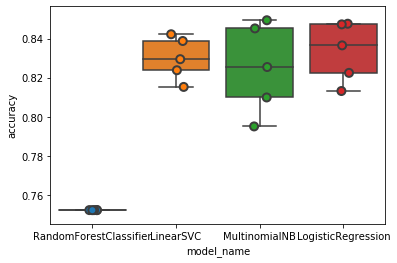

In [18]:
names = ['RFC', 'LSVC', 'MNB', 'LR']
i = 0
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
     LinearSVC(),
     MultinomialNB(),
     LogisticRegression(random_state=0),
]
CV = 5
cv_df3 = pd.DataFrame(index=range(CV * len(models)))
entries = []
i=0
for model in models:
  print('model:' + names[i])
  i+=1
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, post_features, post_labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    print('fold')
    entries.append((model_name, fold_idx, accuracy))
cv_df3 = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df3)
sns.stripplot(x='model_name', y='accuracy', data=cv_df3, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [19]:
cv_df3.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.829911
LogisticRegression        0.833408
MultinomialNB             0.825010
RandomForestClassifier    0.752384
Name: accuracy, dtype: float64

In [23]:
model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(comment_subreddit_features, comment_subreddit_labels, comment_subreddit_df.index, test_size=0.5, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import confusion_matrix
print(metrics.confusion_matrix(y_test, y_pred, labels=[0,1]))
print(metrics.classification_report(y_test, y_pred, labels=[0,1]))

[[16918   122]
 [ 1643  1317]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     17040
           1       0.92      0.44      0.60      2960

    accuracy                           0.91     20000
   macro avg       0.91      0.72      0.77     20000
weighted avg       0.91      0.91      0.90     20000



In [135]:
with open('data/normie_comments1.txt') as json_file:
    normie_data = json.load(json_file)
with open('data/normie_comments2.txt') as json_file:
    normie_data2 = json.load(json_file)
    for key in normie_data:
        normie_data[key] += normie_data2[key]
        
subreddits = normie_data['subreddit']
labels = normie_data['label']
authors = normie_data['user']

In [136]:
dict_subreddits = {}
i = 0
for subreddit in subreddits:
    author = authors[i]
    if author in dict_subreddits:
        dict_subreddits[author] = dict_subreddits[author] + subreddit + ' '
    else:
        dict_subreddits[author] = subreddit + ' '
    i+=1
    
labels = len(dict_subreddits) * [0]

In [137]:
user_subreddits = []
for user in dict_subreddits:
    user_subreddits.append(dict_subreddits[user])
    
subreddit_data = {}
subreddit_data['subreddits'] = user_subreddits
subreddit_data['labels'] = labels

In [138]:
with open('data/troll_comments.txt') as json_file:
    troll_data = json.load(json_file)

subreddits = troll_data['subreddit']
authors = troll_data['user']

dict_subreddits = {}
i = 0
for subreddit in subreddits:
    author = authors[i]
    if author in dict_subreddits:
        dict_subreddits[author] = dict_subreddits[author] + subreddit + ' '
    else:
        dict_subreddits[author] = subreddit + ' '
    i+=1

labels = len(dict_subreddits) * [1]
    
user_subreddits = []
for user in dict_subreddits:
    user_subreddits.append(dict_subreddits[user])
    
subreddit_data['subreddits'] += user_subreddits
subreddit_data['labels'] += labels

In [139]:
sb_df = pd.DataFrame(subreddit_data)
print(sb_df.head())
print(sb_df.tail())

                                          subreddits  labels
0  netflix netflix hometheater hometheater hometh...       0
1  worldcup soccer paradoxplaza paradoxplaza para...       0
2  The_Donald The_Donald The_Donald The_Donald Th...       0
3  newzealand newzealand newzealand rage newzeala...       0
4  Fishing WTF Fishing RoomPorn Fishing Fishing F...       0
                                             subreddits  labels
1107  todayilearned AskReddit AskReddit AskReddit As...       1
1108  CryptoMarkets BitcoinMarkets AskReddit AskRedd...       1
1109  gifs Bad_Cop_No_Donut Bad_Cop_No_Donut Bad_Cop...       1
1110  politics politics politics Bad_Cop_No_Donut Ba...       1
1111  linux linuxmasterrace linuxmasterrace linuxmas...       1


In [140]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=1, norm='l2', encoding='latin-1', ngram_range=(1,2), stop_words='english')
features = tfidf.fit_transform(sb_df.subreddits).toarray()
labels = sb_df.labels

In [141]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline

model = ExtraTreesClassifier()
print('Train, test, split')
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, sb_df.index, test_size=0.33, random_state=0)

print('Fit')
model.fit(X_train, y_train)

print('Predict')
y_pred = model.predict(X_test)

from sklearn.metrics import confusion_matrix
print(metrics.confusion_matrix(y_test, y_pred, labels=[0,1]))
print(metrics.classification_report(y_test, y_pred, labels=[0,1]))

Train, test, split
Fit
Predict
[[300  12]
 [ 11  44]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       312
           1       0.79      0.80      0.79        55

    accuracy                           0.94       367
   macro avg       0.88      0.88      0.88       367
weighted avg       0.94      0.94      0.94       367



In [142]:
models = [
    RandomForestClassifier(),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0)]

for model in models:
    print('Train, test, split')
    X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, sb_df.index, test_size=0.33, random_state=0)
    
    print('Fit')
    model.fit(X_train, y_train)

    print('Predict')
    y_pred = model.predict(X_test)

    from sklearn.metrics import confusion_matrix
    print(metrics.confusion_matrix(y_test, y_pred, labels=[0,1]))
    print(metrics.classification_report(y_test, y_pred, labels=[0,1]))

Train, test, split
Fit
Predict
[[273  39]
 [  6  49]]
              precision    recall  f1-score   support

           0       0.98      0.88      0.92       312
           1       0.56      0.89      0.69        55

    accuracy                           0.88       367
   macro avg       0.77      0.88      0.80       367
weighted avg       0.92      0.88      0.89       367

Train, test, split
Fit
Predict
[[308   4]
 [ 20  35]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       312
           1       0.90      0.64      0.74        55

    accuracy                           0.93       367
   macro avg       0.92      0.81      0.85       367
weighted avg       0.93      0.93      0.93       367

Train, test, split
Fit
Predict
[[312   0]
 [ 49   6]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.93       312
           1       1.00      0.11      0.20        55

    accuracy        

In [143]:
with open('data/normie_posts1.txt') as json_file:
    normie_data = json.load(json_file)
with open('data/normie_posts2.txt') as json_file:
    normie_data2 = json.load(json_file)
    for key in normie_data:
        normie_data[key] += normie_data2[key]
        
subreddits = normie_data['subreddit']
authors = normie_data['user']

dict_subreddits = {}
i = 0
for subreddit in subreddits:
    author = authors[i]
    if author in dict_subreddits:
        dict_subreddits[author] = dict_subreddits[author] + subreddit + ' '
    else:
        dict_subreddits[author] = subreddit + ' '
    i+=1
    
labels = len(dict_subreddits) * [0]

user_subreddits = []
for user in dict_subreddits:
    user_subreddits.append(dict_subreddits[user])
    
subreddit_data = {}
subreddit_data['subreddits'] = user_subreddits
subreddit_data['labels'] = labels

with open('data/troll_posts.txt') as json_file:
    troll_data = json.load(json_file)

subreddits = troll_data['subreddit']
authors = troll_data['user']

dict_subreddits = {}
i = 0
for subreddit in subreddits:
    author = authors[i]
    if author in dict_subreddits:
        dict_subreddits[author] = dict_subreddits[author] + subreddit + ' '
    else:
        dict_subreddits[author] = subreddit + ' '
    i+=1

labels = len(dict_subreddits) * [1]
    
user_subreddits = []
for user in dict_subreddits:
    user_subreddits.append(dict_subreddits[user])
    
subreddit_data['subreddits'] += user_subreddits
subreddit_data['labels'] += labels

sb_df = pd.DataFrame(subreddit_data)
print(sb_df.head())
print(sb_df.tail())

                                          subreddits  labels
0           Xplane Roofing buildapc hotas youtubetv        0
1                paradoxplaza eu4 eu4 eu4 investing        0
2  The_Donald The_Donald The_Donald The_Donald Th...       0
3  iamverysmart newzealand SandersForPresident pi...       0
4  Fishing The_Donald The_Donald The_Donald The_D...       0
                                             subreddits  labels
1185  aww husky gamernews CryptoCurrency Bitcoin Cry...       1
1186  funny gifs Hillary gifs funny The_Donald The_D...       1
1187  American_Politics puppies racism copwatch Bad_...       1
1188  uncen uncen uncen uncen uncen uncen uncen unce...       1
1189  gifs gifs gifs gifs gifs gifs gifs gifs gifs g...       1


In [145]:
features = tfidf.fit_transform(sb_df.subreddits).toarray()
labels = sb_df.labels

models = [
    RandomForestClassifier(),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0)]

for model in models:
    print('Train, test, split')
    X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, sb_df.index, test_size=0.33, random_state=0)
    
    print('Fit')
    model.fit(X_train, y_train)

    print('Predict')
    y_pred = model.predict(X_test)

    from sklearn.metrics import confusion_matrix
    print(metrics.confusion_matrix(y_test, y_pred, labels=[1,0]))
    print(metrics.classification_report(y_test, y_pred, labels=[0,1]))

Train, test, split
Fit
Predict
[[106   2]
 [ 86 199]]
              precision    recall  f1-score   support

           0       0.99      0.70      0.82       285
           1       0.55      0.98      0.71       108

    accuracy                           0.78       393
   macro avg       0.77      0.84      0.76       393
weighted avg       0.87      0.78      0.79       393

Train, test, split
Fit
Predict
[[ 92  16]
 [  1 284]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       285
           1       0.99      0.85      0.92       108

    accuracy                           0.96       393
   macro avg       0.97      0.92      0.94       393
weighted avg       0.96      0.96      0.96       393

Train, test, split
Fit
Predict
[[ 86  22]
 [  1 284]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       285
           1       0.99      0.80      0.88       108

    accuracy        

In [127]:
features[0]

array([0., 0., 0., ..., 0., 0., 0.])